Loading Cleaned Data and Importing:

In [246]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Load the Excel file into a DataFrame
data = pd.read_excel("Cleaned_Survey_ICS487_Project.xlsx")

Encoding the target variable(budget rule) and Scaling numerical features

In [247]:
# Encode the target variable
label_encoder = LabelEncoder()
data['budgeting_rule'] = label_encoder.fit_transform(data['budgeting_rule'])

# Scale numerical features for better performance
scaler = StandardScaler()
numerical_columns = ['salary_(sar)', 'monthly_debt_(sar)', 'elementary_expenses_(sar)', 
                     'debt_to_income_ratio', 'savings_ratio', 'number_of_children']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by StandardScaler.

Model Training:

In [ ]:
# Define features (X) and target (y)
X = data.drop(['budgeting_rule'], axis=1)  # Features
y = data['budgeting_rule']  # Target

# Train a Random Forest model using OOB evaluation
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    oob_score=True,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X, y)

# Get the OOB score
oob_score = rf_model.oob_score_
print(f"OOB Score: {oob_score:.4f}")

# Evaluate the model on training data
y_pred = rf_model.predict(X)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on Training Data: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

OOB Score: 0.8668
Accuracy on Training Data: 0.9020

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       339
           1       0.33      1.00      0.50         8
           2       0.68      0.96      0.80        51

    accuracy                           0.90       398
   macro avg       0.67      0.95      0.75       398
weighted avg       0.95      0.90      0.91       398


Confusion Matrix:
 [[302  14  23]
 [  0   8   0]
 [  0   2  49]]


Feature Importance: Random Forest provides feature importance scores

Feature Importances:
                         Feature  Importance
11                 savings_ratio    0.430479
2      elementary_expenses_(sar)    0.150367
0                   salary_(sar)    0.148094
10          debt_to_income_ratio    0.092592
1             monthly_debt_(sar)    0.071977
4                   state_Single    0.021856
3             number_of_children    0.021020
6                   goal_Savings    0.017189
9              age_group_encoded    0.016013
5                       sex_Male    0.011535
8   employment_status_Unemployed    0.011006
7      employment_status_Student    0.007873


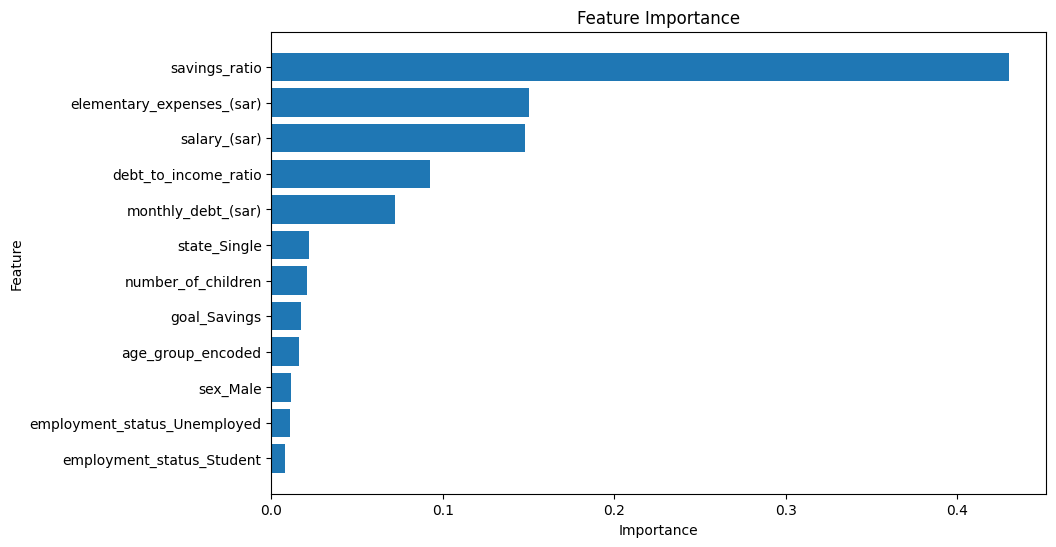

In [ ]:
# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Cross-Validation:

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.87


Saving the model:

In [ ]:
import joblib

# Save the trained random forest model
joblib.dump(rf_model, 'salary_allocation_model.pkl')

['salary_allocation_model.pkl']

In [ ]:
data.columns

Index(['salary_(sar)', 'monthly_debt_(sar)', 'elementary_expenses_(sar)',
       'number_of_children', 'budgeting_rule', 'state_Single', 'sex_Male',
       'goal_Savings', 'employment_status_Student',
       'employment_status_Unemployed', 'age_group_encoded',
       'debt_to_income_ratio', 'savings_ratio'],
      dtype='object')

In [ ]:
data.head()

,salary_(sar),monthly_debt_(sar),elementary_expenses_(sar),number_of_children,budgeting_rule,state_Single,sex_Male,goal_Savings,employment_status_Student,employment_status_Unemployed,age_group_encoded,debt_to_income_ratio,savings_ratio
0,-0.309174,0.513864,-1.167306,-0.731923,2,True,True,True,False,True,0,1.167568,-0.859106
1,-0.576863,-0.459702,-0.666560,-0.731923,0,True,False,True,False,True,3,0.416348,-0.200472
2,-0.157010,0.180665,0.121590,-0.731923,0,True,False,True,False,True,3,0.211835,-0.193161
3,1.423049,-0.994073,-0.807316,-0.731923,0,True,False,True,False,False,0,-1.718130,-0.983080
4,1.409186,1.008436,-1.380940,-0.731923,0,True,False,True,False,False,0,-0.720002,-1.099982
